In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

Сгенерируйте примеры из распределения

In [3]:
c, d = 0.2, 0.8
trapezoid_rv = sts.trapezoid(c,d)
sample = trapezoid_rv.rvs(size=100)
sample

array([0.10224141, 0.6404748 , 0.49261244, 0.71425702, 0.16363521,
       0.2609756 , 0.80897017, 0.88683396, 0.34180793, 0.70693422,
       0.26263697, 0.70296858, 0.68744755, 0.33366268, 0.26819983,
       0.46894716, 0.74820133, 0.38267271, 0.25534514, 0.14861056,
       0.13086267, 0.16096631, 0.08894988, 0.41710168, 0.71774406,
       0.25178024, 0.07492042, 0.8621212 , 0.30386062, 0.27007991,
       0.83246136, 0.16738473, 0.66755479, 0.09608569, 0.39025497,
       0.85548507, 0.16754314, 0.06291896, 0.36866425, 0.32245454,
       0.89837236, 0.25068598, 0.44045399, 0.24492201, 0.79722008,
       0.83837435, 0.38808856, 0.71150383, 0.31012972, 0.08757368,
       0.24904698, 0.50928014, 0.45447043, 0.61918983, 0.81536385,
       0.61277725, 0.6760976 , 0.44589464, 0.66217225, 0.55950018,
       0.50882034, 0.30000175, 0.31118477, 0.03027374, 0.52284328,
       0.49662039, 0.46991527, 0.82611237, 0.52924875, 0.39483667,
       0.23376169, 0.5579612 , 0.50401751, 0.57624216, 0.83473

In [13]:
sample.dtype

dtype('float64')

In [17]:
real_mean = trapezoid_rv.mean() # настоящее среднее случайной величины
real_mean #

0.5000000000000001

In [19]:
real_var = trapezoid_rv.var() # настоящая дисперсия случайной величины
real_var

0.05666666666666659

Сгенерируйте примеры из распределения

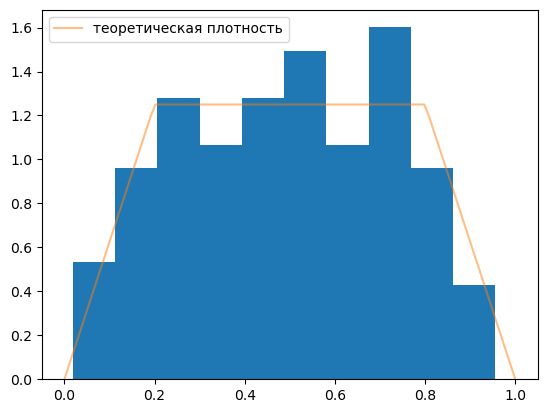

In [35]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(0,1,100)
pdf = trapezoid_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [38]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.48969630191119423
0.05438065710512559


Оценим распределение выборочного среднего для разных объёмов выборок

Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [25]:
sample_big = trapezoid_rv.rvs(size=10000)

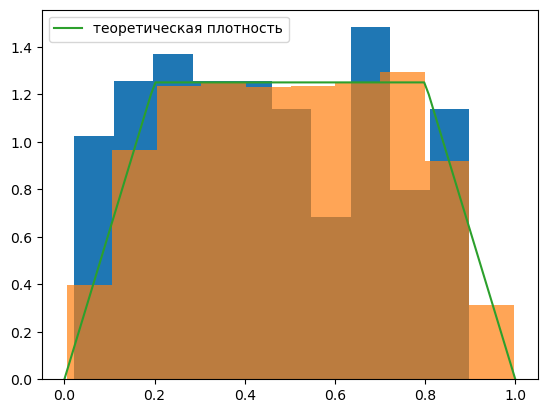

In [27]:
plt.hist( sample, density=True)
plt.hist( sample_big, density=True, alpha=0.7)
x = np.linspace(0,1,100)
pdf = trapezoid_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=1)

plt.legend()

In [33]:
trapezoid_rv.stats()

(0.5000000000000001, 0.05666666666666659)

In [ ]:
Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо? Ваш ответ: Работает хорошо, график ближе к трапеции

In [ ]:
Доверительный интервал на основе ЦПТ

Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [35]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [39]:
sample_telecom = df.rvs(30)
display(sample_telecom)

AttributeError: 'DataFrame' object has no attribute 'rvs'